## Dog vs Cats

In [11]:
import keras
import os
import imageio
import cv2
import matplotlib 
import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
src_train = '<Source folder of training data>'
files = os.listdir(src_train) # Lists the names of the files in folder

In [3]:
files[-6:]

['dog.94.jpg',
 'dog.95.jpg',
 'dog.96.jpg',
 'dog.97.jpg',
 'dog.98.jpg',
 'dog.99.jpg']

In [5]:
# Shuffles the files in the folder
np.random.shuffle(files)

In [6]:
X = [] # Create an empty list to put all training data
Y = [] # the labels go here

for filename in files: # iterates through the filenames in files 
    img = imageio.imread('Source folder of training data/{}'.format(filename)) # reads each image into an array 
    img = img[::2,::2] # reduces the quality of each image array
    img = cv2.resize(img, (125,125)) # resizes all image to a dimension of 125 by 125
    img = (img/225.0) #.reshape(-1) # normalize the data
    X.append(img) # adds each processed image array to X
    if filename.startswith('cat'): Y.append(1) # Labels each image array that is cat as 1
    else: Y.append(0) # labels each image array that is not cat as 0
   



In [7]:
# convert list data into numpy array
features = np.array(X) 
labels = to_categorical(Y)

dog
[1. 0.]


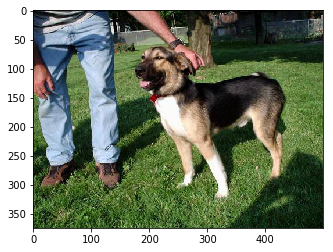

In [8]:
# visual test of features and their labels
plt.figure()
n = 3
print(files[n].split('.')[0])
print(labels[n])
A = imageio.imread(f'Source folder of training data/{files[n]}')
plt.imshow(A)
plt.show()

In [33]:
# Split the features into a train and test set using a ratio of 0.2

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(features,labels, test_size = 0.3, random_state = 4)

In [34]:
# Verify data has the appropriate dimensions
print(f'Shape of training data is: {X_train.shape}')  
print(f'Shape of test data is: {X_test.shape}')
print(f'Shape of train label is: {y_train.shape}')
print(f'Shape of test label is: {y_test.shape}')
print(f'Shape of all labels is: {labels.shape}')

Shape of training data is: (350, 125, 125, 3)
Shape of test data is: (150, 125, 125, 3)
Shape of train label is: (350, 2)
Shape of test label is: (150, 2)
Shape of all labels is: (500, 2)


In [35]:
num_class = y_train.shape[1]
def conv_model():
    model = Sequential()
    
    model.add(Conv2D(filters = 8, kernel_size = (5,5), strides = (1,1), padding = 'same', activation = 'relu', input_shape = X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5), strides = (1,1),padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1),padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1),padding = 'same', activation = 'relu'))
    
    model.add(Flatten())    
    model.add(Dense(4096,activation = 'relu'))
    
    model.add(Dense(num_class, activation = 'softmax'))
    
    model.compile(optimizer='Nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [36]:
model = convolutional_model()

In [37]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, batch_size = 128, verbose= 1)

Train on 350 samples, validate on 150 samples
Epoch 1/200
350/350 [==============================] - 20s 57ms/step - loss: 1.9310 - acc: 0.5057 - val_loss: 0.6889 - val_acc: 0.5400
Epoch 2/200
350/350 [==============================] - 19s 54ms/step - loss: 0.6838 - acc: 0.5257 - val_loss: 0.6923 - val_acc: 0.5267
Epoch 3/200
350/350 [==============================] - 19s 55ms/step - loss: 0.6890 - acc: 0.6057 - val_loss: 0.6766 - val_acc: 0.5667
Epoch 4/200
350/350 [==============================] - 19s 53ms/step - loss: 0.9264 - acc: 0.4686 - val_loss: 0.6978 - val_acc: 0.4600
Epoch 5/200
350/350 [==============================] - 19s 53ms/step - loss: 0.6925 - acc: 0.5171 - val_loss: 0.6981 - val_acc: 0.4600
Epoch 6/200
350/350 [==============================] - 19s 53ms/step - loss: 0.6926 - acc: 0.5171 - val_loss: 0.6981 - val_acc: 0.4600
Epoch 7/200
350/350 [==============================] - 19s 56ms/step - loss: 0.6919 - acc: 0.5171 - val_loss: 0.6455 - val_acc: 0.5800
Epoch 8/2